# 1. An elementary SVM

In [13]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import svm
style.use("ggplot")

In [14]:
# Points and classes
X = np.array([[1, 1], [1, 5], [5, 1], [5, 5]])
y = [-1,1,1,1]

## Question 1
 We choose three support vectors (because three unknown values a,b,c): $[1,1]$ for class $-1$, $[1,5]$ and $[5,1]$ for class $+1$.
 
We solve the three corresponding equations : 
- $a + b + c = -1 $
- $a + 5b + c = -1$
- $5a + b + c = 1$

In [18]:
33S = np.array([[1, 1, 1],[1, 5, 1],[5, 1, 1]])
b = np.array([-1,1,1])
coeff = np.dot(np.linalg.inv(S),np.transpose(b))
print("Straightline equation: ", coeff[0],"x_1 + ",coeff[1],"x_2 + ",coeff[2]," = 0")


SyntaxError: invalid syntax (<ipython-input-18-e4954d917967>, line 1)

## Question 2: Maximal margin classifier and interpretation

In [19]:
# Classifier
clf = svm.SVC(kernel='linear')
# Training
clf.fit(X, y)
# Results
print ("Support vectors: \n",clf.support_vectors_,"\n")
print ("Number of support vectors for each class:\n",clf.n_support_)

Support vectors: 
 [[1. 1.]
 [1. 5.]
 [5. 1.]] 

Number of support vectors for each class:
 [1 2]


In [20]:
# Classify new points
Z = np.array([[2,3],[2,1],[4,5],[1,2]])
print("Classes of points in z: ",clf.predict(Z))

# Score assuming other classes
#yz = [1, 1, 1, -1]
#clf.score(Z,yz)

Classes of points in z:  [ 1 -1  1 -1]


In [21]:
# Weights assigned to the features
w = clf.coef_[0]
print("Diagonal vector to D: \n",w,"\n")

# Straight line separating the two classes: w[0]x_1 + w[1]x_2 + c = 0
print("Straight line equation a x_1 + b x_2 + c = 0: \n", w[0],"x_1 + ",w[1],"x_2 ", clf.intercept_[0],"= 0")
# So: x_2 = -w[0]/w[1] x_1 - c/w[1] = v_1 x_1 + v_2 x_2
v_1 = -w[0] / w[1]
v_2 = - clf.intercept_[0] / w[1]

Diagonal vector to D: 
 [0.49975586 0.49975586] 

Straight line equation a x_1 + b x_2 + c = 0: 
 0.499755859375 x_1 +  0.499755859375 x_2  -1.9988606770833333 = 0


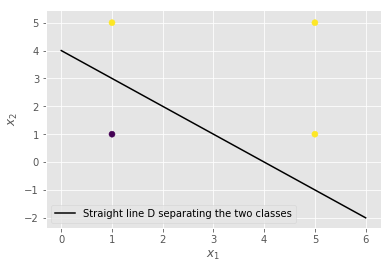

In [22]:
# Plot the results
xx = np.linspace(0,6)
yy = v_1 * xx + v_2
plt.plot(xx, yy, 'k-', label="Straight line D separating the two classes")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [23]:
a = w[0]
b = w[1]
c = clf.intercept_[0]
# We verify that at support point [1,1], ax_1 + bx_2 + c = -1
print("At support point [1,1]: a_x1 + b_x + c =",a * 1 + b * 1 + c)

# We verify that at support points [1,5] and [5,1], ax_1 + bx_2 + c = 1
print("At support point [1,5]: a_x1 + b_x + c =",a * 1 + b * 5 + c)
print("At support point [5,1]: a_x1 + b_x + c =",a * 5 + b * 1 + c)

At support point [1,1]: a_x1 + b_x + c = -0.9993489583333333
At support point [1,5]: a_x1 + b_x + c = 0.9996744791666667
At support point [5,1]: a_x1 + b_x + c = 0.9996744791666667


# 2. IRIS

In [24]:
# Libraries
from sklearn import svm
from sklearn import datasets

Text(0.5, 1.0, 'IRIS dataset projected onto two dimensions. Colors correspond to true classes')

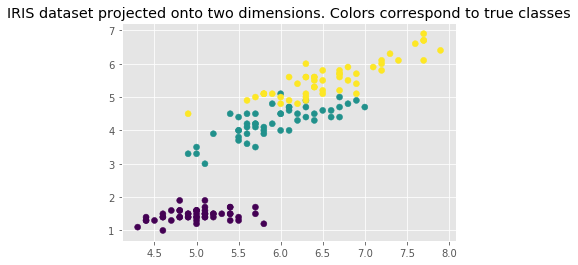

In [25]:
# Load IRIS dataset
# A few other toy datasets can be found at https://scikit-learn.org/stable/datasets/index.html#toy-datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
plt.scatter(X[:,0],X[:,2],c=y)
plt.title("IRIS dataset projected onto two dimensions. Colors correspond to true classes")

In [26]:
# Build training set and test set
num_samples = len(X)
nb_samples = 100
ind = np.random.permutation(num_samples)
train_x = X[ind[:nb_samples]]
train_y = y[ind[:nb_samples]]
test_x = X[ind[nb_samples:]]
test_y = y[ind[nb_samples:]]

# Alternative solution (suggested by the subject)
#ind = [i for i in range(150)]
#np.random.shuffle(ind)

In [27]:
# Learn with SVM
# By default, kernel='rbf'. Use linear for linear. 
# gamma gives kernel coefficient for rbf
# See https://scikit-learn.org/stable/modules/svm.html#svm-kernels for more details. 
clf = svm.SVC(gamma='scale') 
clf.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
# Prediction with SVM
predictions = clf.predict(test_x)
# Computes the corresponding score (error rate)
clf.score(test_x,test_y)

0.94

For a data point $X$, let $T(X)$ be the actual class of $X$, and $P(X)$ the classifier output for $X$.
$\DeclareMathOperator{\card}{Card}$

Precision for class $i$:
$$
\frac{\card\{[P(X)=T(X)]\cap[P(X)=i]\}}{\card\{P(x)=i\}}
$$

Recall for class $i$:
$$
\frac{\card\{[P(X)=T(X)]\cap[P(X)=i]\}}{\card\{T(x)=i\}}
$$

In [29]:
# Compute precision and recall for each class
NUM_SAMPLES = len(X)
NUM_CLASSES = len(np.unique(y))
NUM_TRAINING_SAMPLES = 100
NUM_TEST_SAMPLES = NUM_SAMPLES - NUM_TRAINING_SAMPLES

for i in range(NUM_CLASSES):
    num_correct_predictions_class_i = 0  # Number of samples correctly predicted to be in class i
    num_predictions_class_i = 0  # Number of samples predicted to be in class i
    num_actual_class_i = 0  # Number of samples that are actually in class i
    
    for j in range(NUM_TEST_SAMPLES):
        if test_y[j] == i:
            num_actual_class_i += 1
        if predictions[j] == i:
            num_predictions_class_i += 1
        if test_y[j] == i and predictions[j] == i:
            num_correct_predictions_class_i += 1
            
    # Note: we may divide by 0 here and get NaN...
    precision_class_i = num_correct_predictions_class_i / num_predictions_class_i
    recall_class_i = num_correct_predictions_class_i / num_actual_class_i
    
    print(f'Class {i} - Precision={precision_class_i}, Recall={recall_class_i}')

Class 0 - Precision=1.0, Recall=1.0
Class 1 - Precision=0.9375, Recall=0.8823529411764706
Class 2 - Precision=0.8888888888888888, Recall=0.9411764705882353


- Precision(i) = 1: all samples predicted to be in class i are actually in class i
- Recall(i) = 1: same number of samples in class i and correctly predicted to be in class i

- Precision(i) < 1: some samples predicted to be in class i actually belong to other classes
- Recall(i) < 1: samples of actual class i have been assigned to other classes 

In [31]:
from sklearn.model_selection import KFold

classifier = svm.SVC(kernel="sigmoid", degree=2, gamma='auto')  # Set gamma=auto to avoid a warning

iris = datasets.load_iris()
X, y = iris.data, iris.target

NUM_CLASSES = len(np.unique(y))

NUM_SPLITS = 10
# Prepare the splits : data is shuffled, then 10 splits are created for cross-validation
kf = KFold(n_splits=NUM_SPLITS, shuffle=True)

precision = np.zeros((NUM_CLASSES, NUM_SPLITS))  # Precision for each class and each split
recall = np.zeros((NUM_CLASSES, NUM_SPLITS))  # Recall for each class and each split

# Train, test and compute the metrics on each split
for i_split, (train_inds, test_inds) in enumerate(kf.split(X)):
    # Prepare training and testing datasets
    train_X = X[train_inds]
    train_y = y[train_inds]
    test_X = X[test_inds]
    test_y = y[test_inds]
    
    # Training (the classifier is re-trained from scratch for each split, there is no memory between iterations)
    classifier.fit(train_X, train_y)
    
    # Predictions on the test set
    predictions = classifier.predict(test_X)
    
    # Compute precision and recall for each class for the current split
    for i_class in range(NUM_CLASSES):
        precision[i_class, i_split] = np.sum(np.logical_and(predictions == test_y, predictions == i_class)) / np.sum(predictions == i_class)
        recall[i_class, i_split] = np.sum(np.logical_and(predictions == test_y, predictions == i_class)) / np.sum(test_y == i_class)
        
for i_class in range(3):
    print(f'Class {i_class}\n    Precision={precision[i_class].mean()}\n    Recall={recall[i_class].mean()}')

Class 0
    Precision=nan
    Recall=0.4
Class 1
    Precision=nan
    Recall=0.2
Class 2
    Precision=nan
    Recall=0.3


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid